## <font size=5> <strong>Parkonson's Disease Prediction


## I. Importing essential libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'parkinsons.csv', 'parkinsons1.csv', 'sample_data']


## II. Importing and understanding our dataset

In [52]:
dataset = pd.read_csv("/content/parkinsons1.csv")

#### Verifying it as a 'dataframe' object in pandas

In [53]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [54]:
dataset.shape

(195, 23)

#### Printing out a few columns

In [55]:
dataset.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [56]:
dataset.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
61,223.365,238.987,98.664,0.00264,0.00001,0.00154,0.00151,0.00461,0.01906,0.165,...,0.03039,0.00301,26.138,0,0.447979,0.686264,-7.293801,0.086372,2.321560,0.098555
35,201.464,210.565,195.708,0.00198,0.00001,0.00105,0.00115,0.00314,0.01194,0.107,...,0.01758,0.00135,31.732,0,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
29,162.568,198.346,77.630,0.00502,0.00003,0.00280,0.00253,0.00841,0.01791,0.168,...,0.02380,0.01170,25.678,1,0.427785,0.723797,-6.635729,0.209866,1.957961,0.135242
183,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,...,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777


#### Description

In [57]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [59]:
###Luckily, we have no missing values

#### Analysing the 'target' variable

In [60]:
dataset["status"].describe()

count    195.000000
mean       0.753846
std        0.431878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

In [61]:
dataset["status"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [62]:
print(dataset.corr()["status"].abs().sort_values(ascending=False))

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64


In [63]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    147
0     48
Name: status, dtype: int64


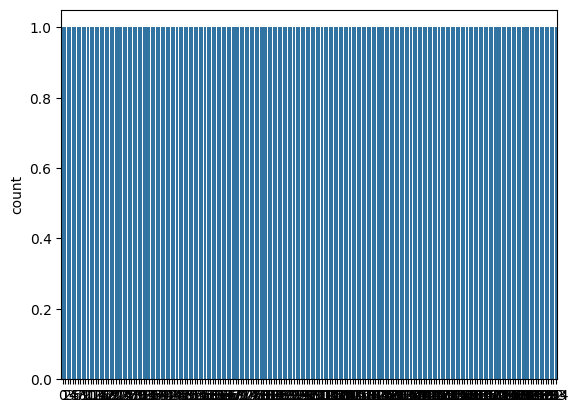

In [64]:
y = dataset["status"]

sns.countplot(y)


target_temp = dataset.status.value_counts()

print(target_temp)

In [65]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 15.84
Percentage of patience with heart problems: 48.51


## IV. Train Test split

In [66]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("status",axis=1)
target = dataset["status"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [67]:
X_train.shape

(156, 22)

In [68]:
X_test.shape

(39, 22)

In [69]:
Y_train.shape

(156,)

In [70]:
Y_test.shape

(39,)

## V. Model Fitting

In [71]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [73]:
Y_pred_lr.shape

(39,)

In [74]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 89.74 %


### Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [76]:
Y_pred_nb.shape

(39,)

In [77]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 66.67 %


### SVM

In [78]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [79]:
Y_pred_svm.shape

(39,)

In [80]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 92.31 %


### K Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [82]:
Y_pred_knn.shape

(39,)

In [83]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 89.74 %


### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [85]:
print(Y_pred_dt.shape)

(39,)


In [86]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 89.74 %


### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [88]:
Y_pred_rf.shape

(39,)

In [89]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 97.44 %


### XGBoost

In [90]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [91]:
Y_pred_xgb.shape

(39,)

In [92]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 94.87 %


### Neural Network

In [93]:
from keras.models import Sequential
from keras.layers import Dense

In [96]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=22))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [97]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 8ms/step - loss: 61.2429 - accuracy: 0.2436
Epoch 2/300
5/5 [==============================] - 0s 6ms/step - loss: 57.3970 - accuracy: 0.2436
Epoch 3/300
5/5 [==============================] - 0s 5ms/step - loss: 53.7252 - accuracy: 0.2436
Epoch 4/300
5/5 [==============================] - 0s 5ms/step - loss: 50.3128 - accuracy: 0.2436
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 46.9211 - accuracy: 0.2436
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 43.7518 - accuracy: 0.2436
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 40.5736 - accuracy: 0.2436
Epoch 8/300
5/5 [==============================] - 0s 4ms/step - loss: 37.5277 - accuracy: 0.2436
Epoch 9/300
5/5 [==============================] - 0s 5ms/step - loss: 34.4996 - accuracy: 0.2436
Epoch 10/300
5/5 [==============================] - 0s 5ms/step - loss: 31.5439 - accuracy: 0.2436
Epoch 11/300
5/5 [=

In [98]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [99]:
Y_pred_nn.shape

(39, 1)

In [100]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [101]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 89.74 %


## VI. Output final score

In [102]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 89.74 %
The accuracy score achieved using Naive Bayes is: 66.67 %
The accuracy score achieved using Support Vector Machine is: 92.31 %
The accuracy score achieved using K-Nearest Neighbors is: 89.74 %
The accuracy score achieved using Decision Tree is: 89.74 %
The accuracy score achieved using Random Forest is: 97.44 %
The accuracy score achieved using XGBoost is: 94.87 %
The accuracy score achieved using Neural Network is: 89.74 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

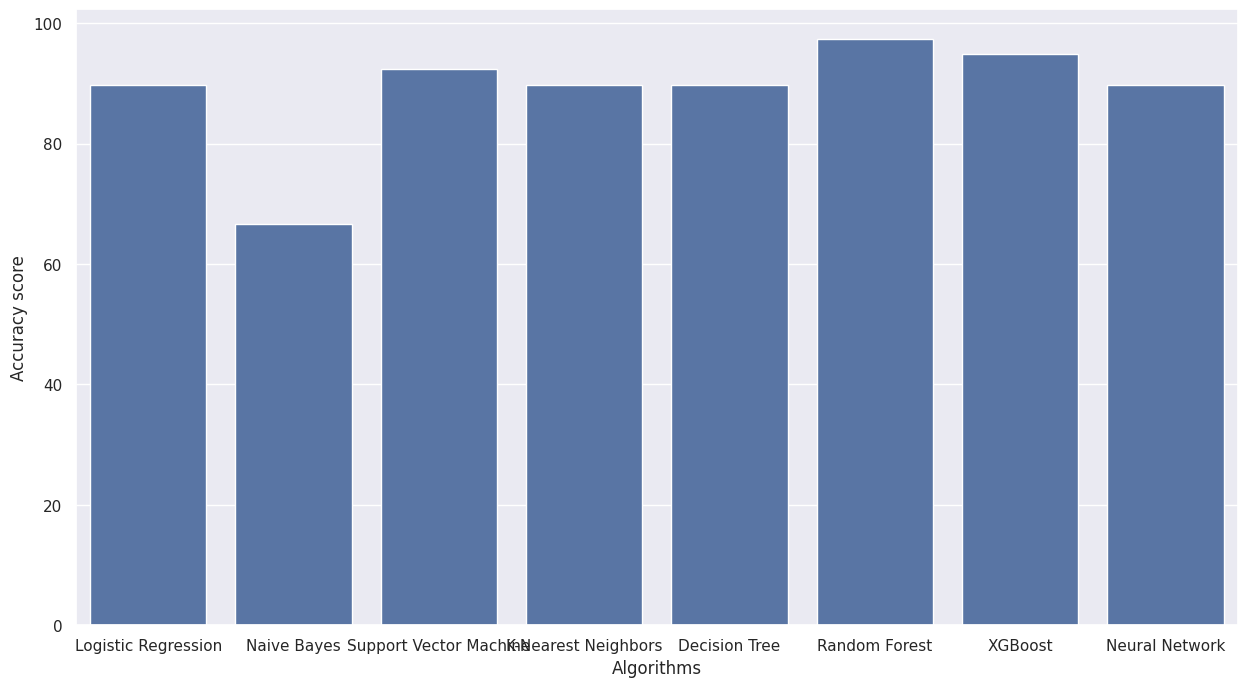

In [103]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>

In [107]:
input_data = (197.724,177.584,0.00298,0.00002,0.00165,0.00175,0.00496,0.01495,0.135,0.00774,0.00941,0.01233,0.02321,0.00231,26.822,1,0.32648,0.765623,-6.647379,0.201095,2.374073,0.130554)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinson's Disease")

else:
  print("The Person has Parkinson's Disease")

[1]
The Person has Parkinson's Disease


In [108]:
import pickle

In [109]:
filename = 'diabetes_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [110]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [112]:
input_data = (197.724,177.584,0.00298,0.00002,0.00165,0.00175,0.00496,0.01495,0.135,0.00774,0.00941,0.01233,0.02321,0.00231,26.822,1,0.32648,0.765623,-6.647379,0.201095,2.374073,0.130554)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have Parkinson's Disease")
else:
  print("The person has Parkinson's Disease")

[1]
The person has Parkinson's Disease
